# **Text** **Clustering**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


preprocessing data

In [17]:
df=pd.read_csv('/content/drive/MyDrive/Corona.csv',header=0,encoding='cp437')

In [18]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [19]:
df.shape

(41157, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [21]:
df.isnull().sum()

,0
UserName,0
ScreenName,0
Location,8590
TweetAt,0
OriginalTweet,0
Sentiment,0


In [22]:
df['Location']=df['Location'].fillna(df['Location'].mode()[0])

In [23]:
df.isnull().sum()

,0
UserName,0
ScreenName,0
Location,0
TweetAt,0
OriginalTweet,0
Sentiment,0


In [24]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

Feature Extraction

In [25]:
df['count_char']=df['OriginalTweet'].apply(lambda x :len(x))
df['count_word']=df['OriginalTweet'].apply(lambda x: len(x.split()))
df['Numbers'] = df['OriginalTweet'].apply(lambda x : len([i for i in x if i.isdigit()]))
df['Special'] = df['OriginalTweet'].apply(lambda x : len([i for i in x if i in '!@#$%^&*()']))
df['Links'] = df['OriginalTweet'].apply(lambda x : x.count('https:'))

In [26]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,count_char,count_word,Numbers,Special,Links
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,8,5,3,3
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,0,0,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,14,4,0,1
3,3802,48754,London,16-03-2020,My food stock is not the only one which is emp...,Positive,306,42,10,7,1
4,3803,48755,London,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,40,4,6,1


In [27]:
df.columns


Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'count_char', 'count_word', 'Numbers', 'Special', 'Links'],
      dtype='object')

In [28]:
x=df.drop(['UserName','ScreenName','Location','TweetAt','OriginalTweet','Sentiment'],axis=1)

In [29]:
x

,count_char,count_word,Numbers,Special,Links
0,111,8,5,3,3
1,237,38,0,0,0
2,131,14,4,0,1
3,306,42,10,7,1
4,310,40,4,6,1
...,...,...,...,...,...
41152,102,12,5,2,1
41153,138,23,2,0,0
41154,136,18,0,6,0
41155,111,18,2,3,0


KMeans algorithm for numerical data

In [30]:
from sklearn.cluster import KMeans

In [31]:
kmean_model=KMeans(n_clusters=5,random_state=33,init='k-means++',algorithm='auto')

In [32]:
kmean_model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=5, random_state=33)

In [33]:
print('Kmeans model centers ',kmean_model.cluster_centers_)

Kmeans model centers  [[244.98489024  37.72308277   3.44331464   3.33374513   0.45281764]
 [141.07706186  20.49626289   2.70579897   2.01056701   0.59445876]
 [194.68690133  29.44177726   2.99134449   2.64558569   0.52221581]
 [ 84.41835331  12.31597563   1.9909609    0.89133425   0.46276282]
 [286.72861842  41.78190789   4.54232456   4.55877193   0.84967105]]


In [34]:
pd.Series(kmean_model.labels_).value_counts()

,count
0,10523
4,9141
2,8644
1,7741
3,5108


In [35]:
print("Kmeans inertia",kmean_model.inertia_)

Kmeans inertia 11871218.340662384


In [36]:
kmean_model.n_iter_

9

In [37]:
# cal sumation square distance
ssd={}
for i in range(2,22):
  kmean_model=KMeans(n_clusters=i,random_state=33,init='k-means++',algorithm='auto')
  kmean_model.fit(x)
  ssd[i]=kmean_model.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWar

In [38]:
ssd

{2: 53893864.30416906,
 3: 26927396.196309067,
 4: 17408182.222417768,
 5: 11871218.340662384,
 6: 8974588.038317744,
 7: 7309029.567362763,
 8: 6105394.044869544,
 9: 5158874.842310317,
 10: 4535872.792092195,
 11: 4110478.461244211,
 12: 3775306.5384918866,
 13: 3544858.1353938277,
 14: 3351227.4126826595,
 15: 3187390.966424373,
 16: 3037554.447249107,
 17: 2902325.79019339,
 18: 2782223.0717729675,
 19: 2670247.3149776673,
 20: 2575673.9160667956,
 21: 2492717.594288319}

In [39]:
ssd={i:k/10000000 for i ,k  in zip(ssd.keys(),ssd.values())}

In [40]:
ssd

{2: 5.389386430416906,
 3: 2.6927396196309066,
 4: 1.7408182222417767,
 5: 1.1871218340662384,
 6: 0.8974588038317743,
 7: 0.7309029567362763,
 8: 0.6105394044869544,
 9: 0.5158874842310317,
 10: 0.4535872792092195,
 11: 0.4110478461244211,
 12: 0.37753065384918866,
 13: 0.35448581353938274,
 14: 0.33512274126826597,
 15: 0.3187390966424373,
 16: 0.30375544472491073,
 17: 0.290232579019339,
 18: 0.27822230717729673,
 19: 0.26702473149776673,
 20: 0.2575673916066796,
 21: 0.2492717594288319}

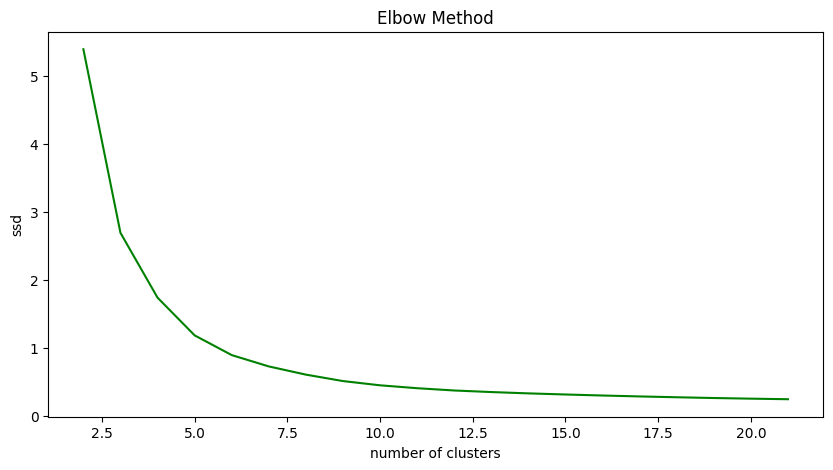

In [41]:
plt.figure(figsize=(10,5))
plt.plot(ssd.keys(),ssd.values(),color='g',linestyle='solid')
plt.xlabel('number of clusters')
plt.ylabel('ssd')
plt.title('Elbow Method')
plt.show()

KModes algorithm for categorical and numerical data

In [42]:
!pip install kmodes
from kmodes.kmodes import KModes

In [43]:
kmodes_model=KModes(n_clusters=3,init='Huang',n_init=5,verbose=1)

In [44]:
kmodes_model.fit(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6170, cost: 358353.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10056, cost: 355394.0
Run 2, iteration: 2/100, moves: 10976, cost: 353345.0
Run 2, iteration: 3/100, moves: 1637, cost: 353345.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7346, cost: 357501.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 17813, cost: 351177.0
Run 4, iteration: 2/100, moves: 3114, cost: 351177.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7685, cost: 357163.0
Best run was number 4


KModes(init='Huang', n_clusters=3, n_init=5, verbose=1)

In [45]:
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 381302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 381302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 381302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 381302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 381302.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6663, cost: 366052.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9647, cost: 362811.0
Run 2, iteration: 2/100, moves: 5104, cost: 360941.0
Run 2, it

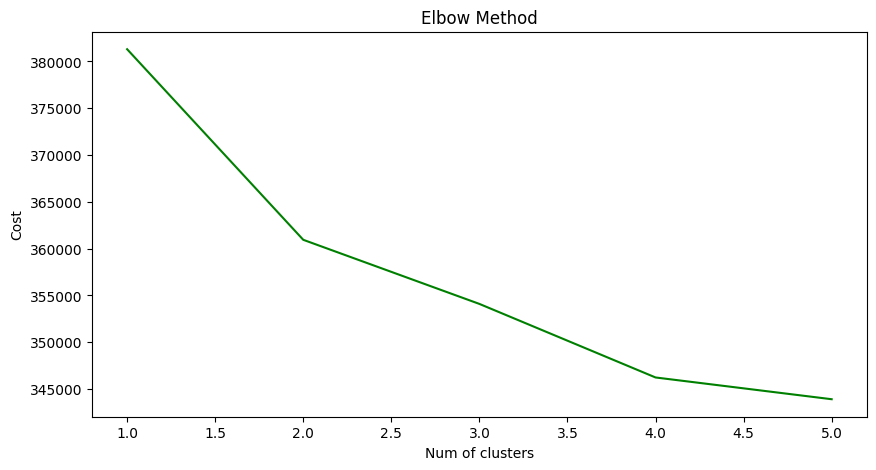

In [47]:
plt.figure(figsize=(10,5))
plt.plot(K, cost, color='g',linestyle='solid')
plt.xlabel('Num of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method')
plt.show()